In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"]=(25,15)
%matplotlib inline
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

# Data preprocessing

In [24]:
red_df=pd.read_csv("winequality-red.csv",sep=";")
white_df=pd.read_csv("winequality-white.csv", sep=";")
color_red = np.repeat("red", red_df.shape[0])
color_white = np.repeat("white", white_df.shape[0])
red_df.insert(loc=0,column="type",value=color_red)
white_df.insert(loc=0,column="type",value=color_white)
wine_df=red_df.append(white_df)
replace_list = {"type" : {"red": 1, "white" : 0,}}
wine_df.replace(replace_list,inplace=True)


In [25]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## visualizing data

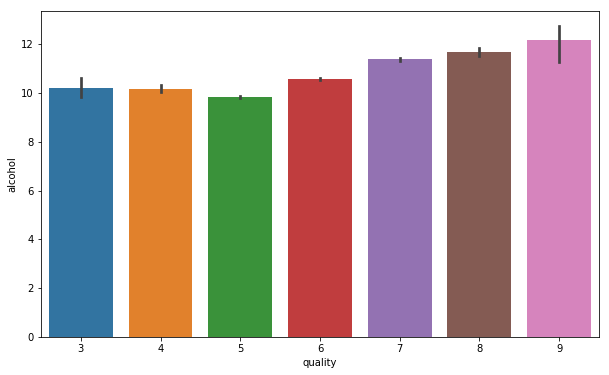

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_df)


In [31]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

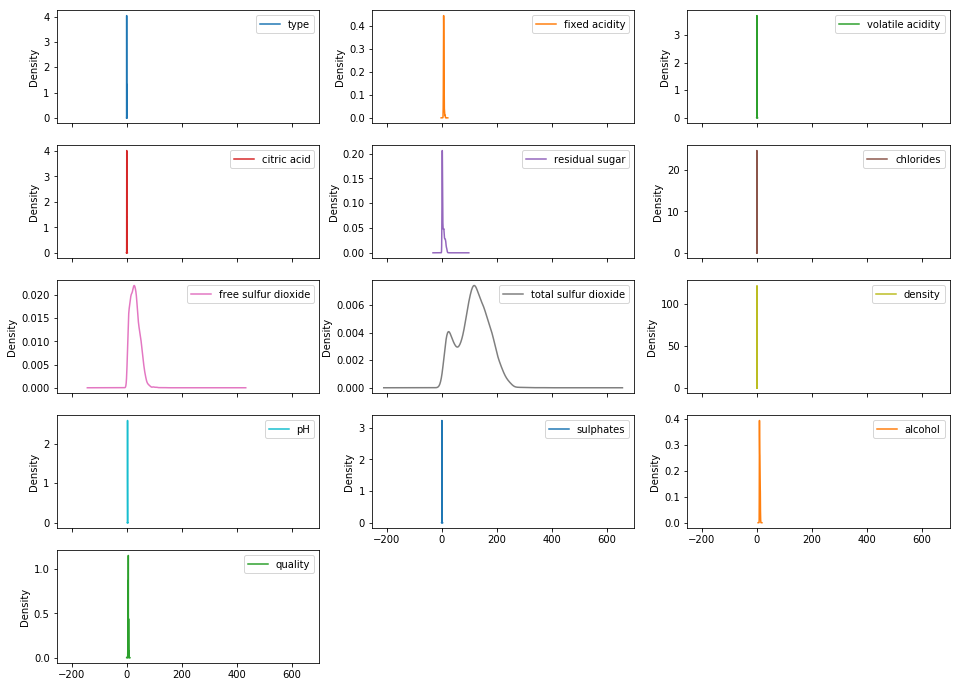

In [32]:
wine_df.plot(kind='density', subplots=True,layout=(5,3))
plt.show()

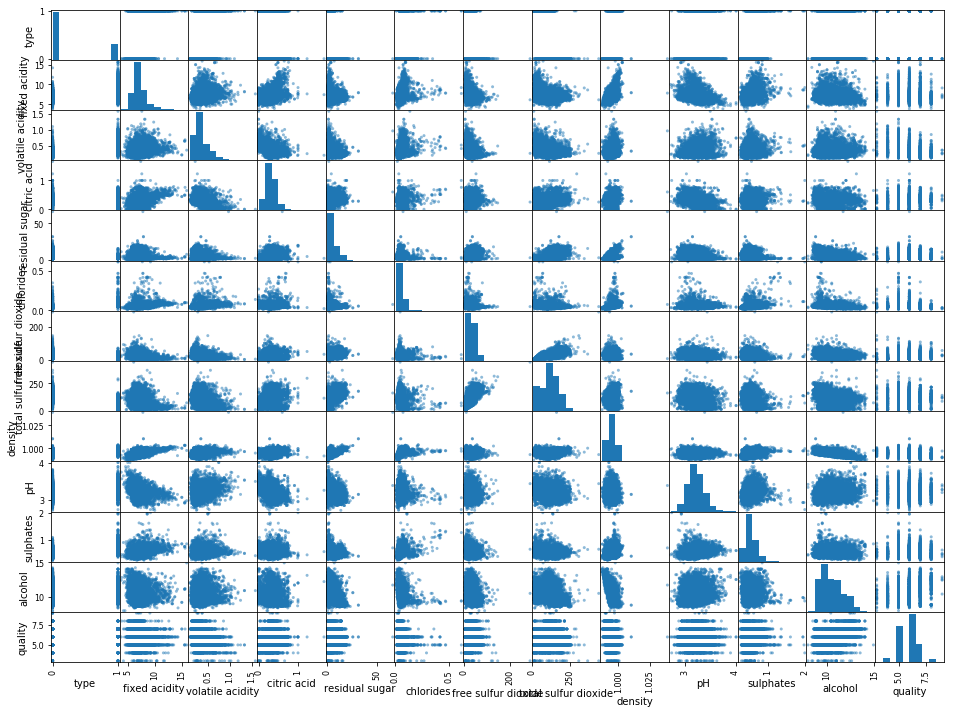

In [34]:
# Scatterplot matrix
scatter_matrix(wine_df)
plt.show()

## feature selection

In [ ]:
X=wine_df.drop(columns="alcohol",axis=1).values
y=wine_df[["alcohol"]].values.ravel()


## train test split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## model evaluation


In [39]:
# Set up Algorithms Spot-Checking Array
# Run algorithms using 10-fold cross validation
seedNum = 888
num_folds = 10
scoring = 'neg_mean_squared_error'
models = []
models.append(('LR', LinearRegression()))
models.append(('RR', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('CART', DecisionTreeRegressor(random_state=seedNum)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor(random_state=seedNum)))
models.append(('ET', ExtraTreesRegressor(random_state=seedNum)))
models.append(('AB', AdaBoostRegressor(random_state=seedNum)))
models.append(('GBM', GradientBoostingRegressor(random_state=seedNum)))
results = []
names = []
metrics = []

In [61]:
# Generate model in turn
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics (RMSE) from all models:',np.mean(metrics))

LR: -0.269792 (0.154612)
Model training time: 0:00:00.020433
RR: -0.269754 (0.154041)
Model training time: 0:00:00.014468
LASSO: -1.419619 (0.090498)
Model training time: 0:00:00.015270
EN: -1.123222 (0.069886)
Model training time: 0:00:00.015008
CART: -0.325157 (0.043617)
Model training time: 0:00:00.318913
KNN: -0.353007 (0.024918)
Model training time: 0:00:00.299235
SVM: -0.151782 (0.019733)
Model training time: 0:00:07.990668
RF: -0.174004 (0.022491)
Model training time: 0:00:01.978689
ET: -0.168028 (0.022874)
Model training time: 0:00:01.004786
AB: -0.422971 (0.027325)
Model training time: 0:00:02.976649
GBM: -0.217527 (0.015852)
Model training time: 0:00:02.338908
Average metrics (RMSE) from all models: -0.444987412513


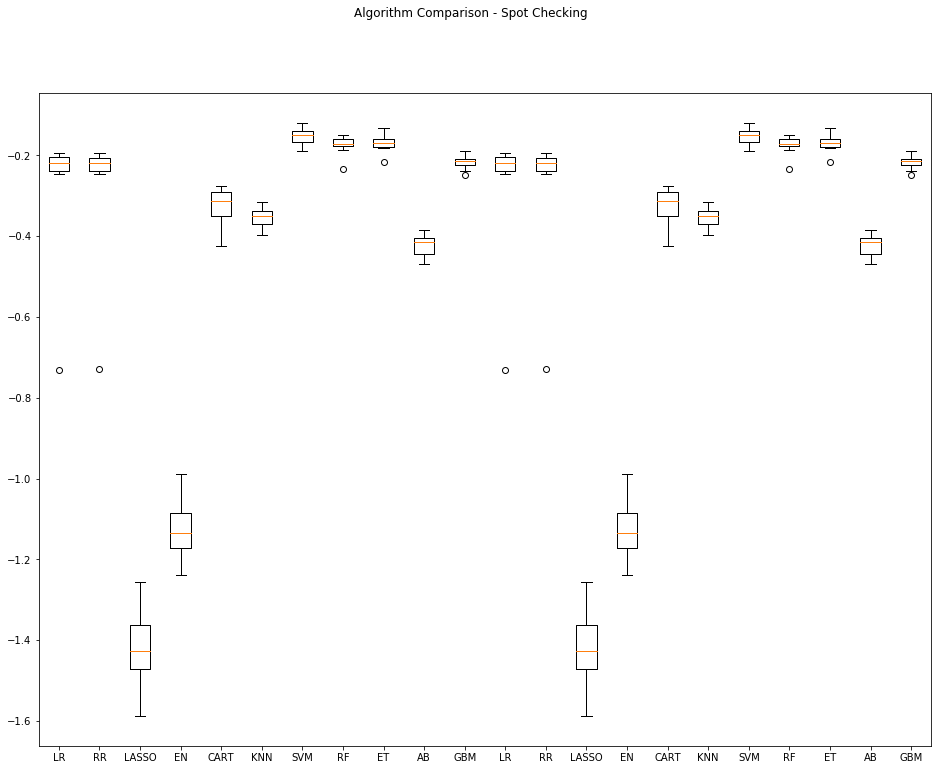

In [46]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## support vector regressor

In [47]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=10)
grid_search.fit(X_train, y_train)




GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.897696 using {'C': 10, 'gamma': 0.1}
-0.012757 (0.012221) with: {'C': 0.001, 'gamma': 0.001}
0.072196 (0.015026) with: {'C': 0.001, 'gamma': 0.01}
0.176124 (0.017786) with: {'C': 0.001, 'gamma': 0.1}
-0.014066 (0.012041) with: {'C': 0.001, 'gamma': 1}
0.090162 (0.015812) with: {'C': 0.01, 'gamma': 0.001}
0.459009 (0.022306) with: {'C': 0.01, 'gamma': 0.01}
0.583132 (0.020934) with: {'C': 0.01, 'gamma': 0.1}
0.074355 (0.015409) with: {'C': 0.01, 'gamma': 1}
0.480369 (0.027156) with: {'C': 0.1, 'gamma': 0.001}
0.765754 (0.011563) with: {'C': 0.1, 'gamma': 0.01}
0.828603 (0.014661) with: {'C': 0.1, 'gamma': 0.1}
0.432642 (0.024967) with: {'C': 0.1, 'gamma': 1}
0.763665 (0.029752) with: {'C': 1, 'gamma': 0.001}
0.875748 (0.012445) with: {'C': 1, 'gamma': 0.01}
0.891640 (0.012956) with: {'C': 1, 'gamma': 0.1}
0.726459 (0.022424) with: {'C': 1, 'gamma': 1}
0.842886 (0.051935) with: {'C': 10, 'gamma': 0.001}
0.890592 (0.013517) with: {'C': 10, 'gamma': 0.01}
0.897696 (0.012300) with: 

In [52]:
svr = SVR(C=10,gamma=0.1)
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)


In [53]:
print("Training set score: {:.2f}".format(svr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.89


## extra tree regressor

In [55]:
# Tuning algorithm  - Extra Trees
paramGrid2 = dict(n_estimators=np.array([250,500,600,750,900]))
model2 = ExtraTreesRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('ET')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.148969 using {'n_estimators': 900}
-0.150775 (0.020758) with: {'n_estimators': 250}
-0.149556 (0.020188) with: {'n_estimators': 500}
-0.149407 (0.020318) with: {'n_estimators': 600}
-0.149266 (0.020493) with: {'n_estimators': 750}
-0.148969 (0.020380) with: {'n_estimators': 900}


Text(0,0.5,'RF Accuracy')

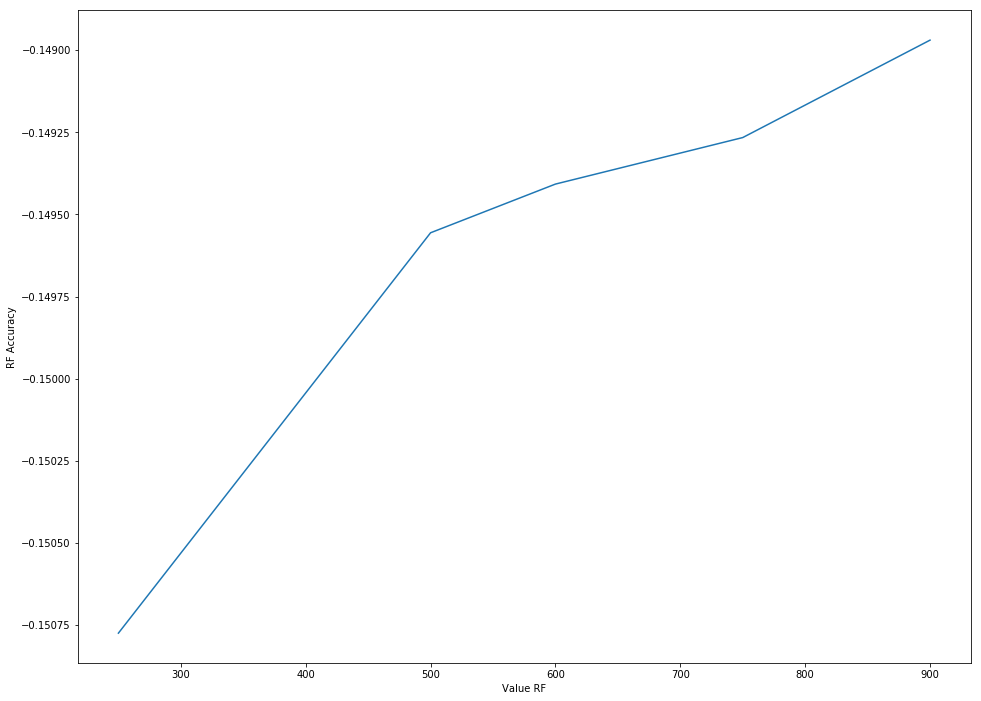

In [62]:
# plot the results
# this is identical to the one we generated above
xx=[250,500,600,750,900]
plt.plot(xx, means)
plt.xlabel('Value RF')
plt.ylabel('RF Accuracy')



In [57]:
model = ExtraTreesRegressor(n_estimators=900, random_state=seedNum)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(mean_squared_error(y_test, predictions))

0.167762626279


In [58]:
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))



Training set score: 1.00
Test set score: 0.88


In [12]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import learning_curve, KFold


def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                    label="training " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
             label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)


def plot_ridge_n_samples(X,y,alpha=1):
    plot_learning_curve(Ridge(alpha=alpha), X, y)
    plot_learning_curve(LinearRegression(), X, y)
    plt.legend(loc=(0, 1.05), ncol=2, fontsize=18)

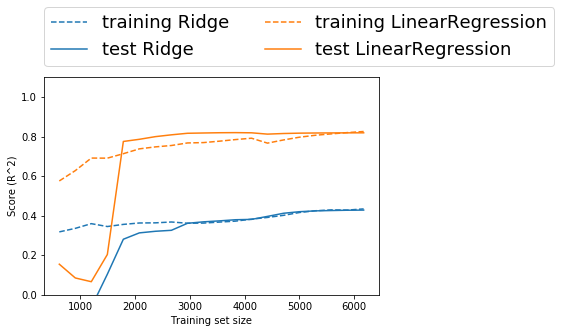

In [13]:
# Learning curves
plot_ridge_n_samples(X,y,alpha=1)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=10)
reg.fit(X_train,y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to wherever
neighbors_settings = list(range(1, 10))
for n_neighbors in neighbors_settings:
# build the model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(reg.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(reg.score(X_test, y_test))
 

Test set R^2: 0.73


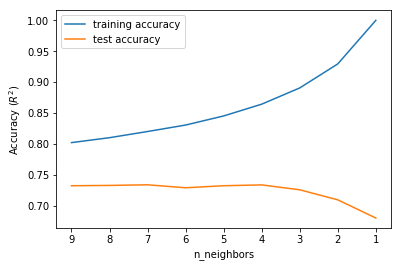

In [15]:
   
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy ($R^2$)")
plt.xlabel("n_neighbors")
plt.gca().invert_xaxis()
plt.legend()

